In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gravity_problem(state):
    x, y, u, v = state
    dxdt = u
    dydt = v
    dudt = -x / (x**2 + y**2)
    dvdt = -y / (x**2 + y**2)
    return np.array([dxdt, dydt, dudt, dvdt])

In [21]:
def method(h, N):
    t_span = np.arange(0, 4 * np.pi, h)
    num_steps = len(t_span)

    # Initial conditions
    initial_state = np.array([1, 0, 0, 1])

    # Array to store solutions
    solution = np.zeros((num_steps, 4))
    solution[0] = initial_state

    for i in range(1, num_steps):
        t = t_span[i]
        
        if i == 1:
            val = -4*solution[i-1] + 4*h*gravity_problem(solution[i-1])
        else:
            val = -4*solution[i-1] + 5*solution[i-2] + 4*h*gravity_problem(solution[i-1]) + 2*h*gravity_problem(solution[i-2])

        solution[i] = val
        
    return t_span, solution

Norm of solution at time interval 4π for N=20: 1.1392715214386067e+28


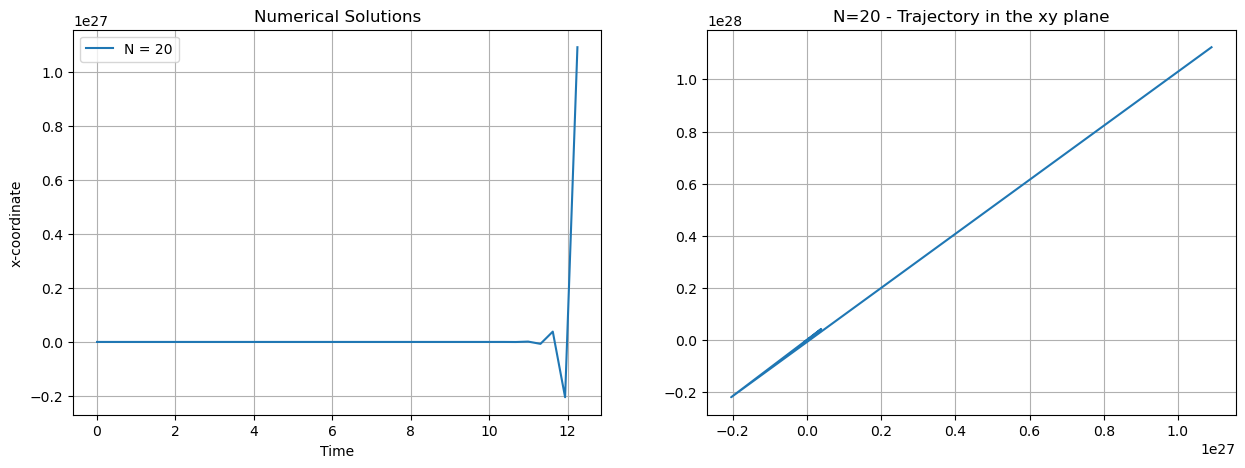

Norm of solution at time interval 4π for N=40: 1.040742618066612e+56


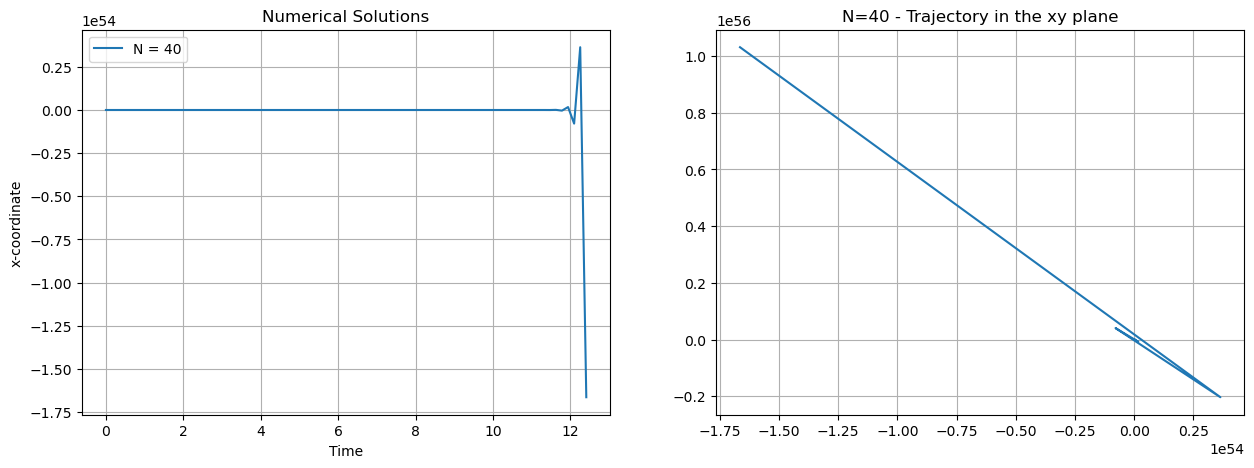

Norm of solution at time interval 4π for N=80: 8.665441793915695e+111


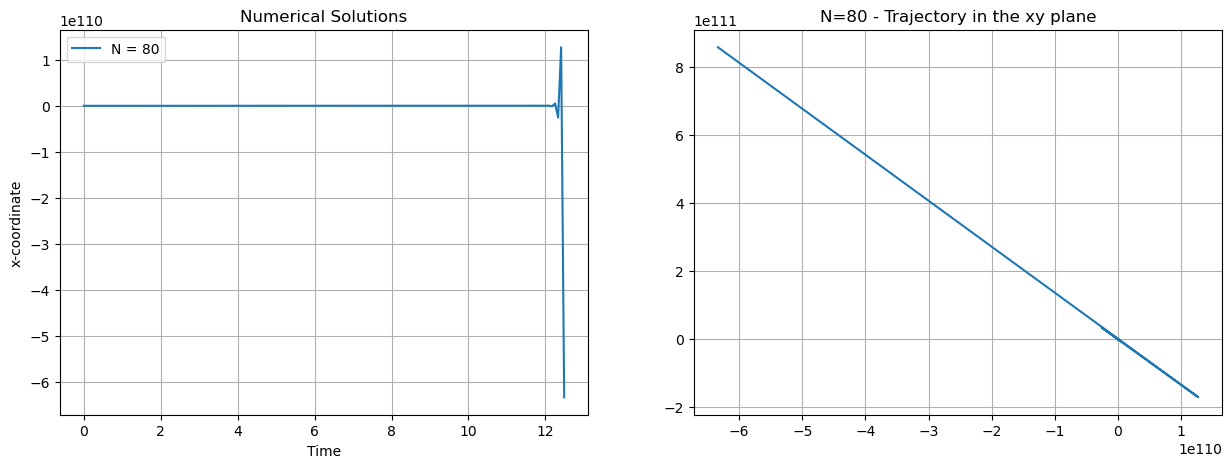

In [23]:
# Set N values
N_values = [20, 40, 80]

# Plot numerical solutions for different N values


for N in N_values:
    h = 2 * np.pi / N
    t_span, solution = method(h, N)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t_span, solution[:, 0], label=f'N = {N}')
    plt.title('Numerical Solutions')
    plt.xlabel('Time')
    plt.ylabel('x-coordinate')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(solution[:, 0], solution[:, 1])
    plt.title(f'N={N} - Trajectory in the xy plane')
    plt.grid()

    print(f'Norm of solution at time interval 4π for N={N}: {np.linalg.norm(solution[-1])}')
    plt.show()